# Lecture 3 : Getting started with Neural Networks

We’ll apply what you’ve learned to three new problems covering the three most common use cases of neural networks: binary classification, multiclass classification, and scalar regression.

We’ll dive into three introductory examples of how to use neural networks to address real problems:

* Classifying movie reviews as positive or negative (binary classification)
* Classifying news wires by topic (multiclass classification)
* Estimating the price of a house, given real-estate data (regression)

## Anatomy of a neural network

(From previous lecture) training a neural network revolves around the following objects:

* **Layers**, which are combined into a network (or model)
* The **input data** and corresponding **targets**
* The **loss function**, which defines the feedback signal used for learning
* The **optimizer**, which determines how learning proceeds

You can visualize their interaction:
![](https://dpzbhybb2pdcj.cloudfront.net/chollet/Figures/03fig01.jpg)

The network, composed of layers that are chained together, maps the input data to predictions. The loss function then compares these predictions to the targets, producing a loss value: a measure of how well the network’s predictions match what was expected. The optimizer uses this loss value to update the network’s weights.




...Let’s take a closer look at layers, networks, loss functions, and optimizers.

 ## Layers: the building blocks of deep learning
 
 The fundamental data structure in neural networks is the **layer**. A layer is a data-processing module that takes as input one or more tensors and that outputs one or more tensors. 
 
Some layers are stateless, but more frequently layers have a state: the layer’s weights, one or several tensors learned with stochastic gradient descent, which together contain the network’s knowledge.

Different layers are appropriate for different tensor formats and different types of data processing. For instance, simple vector data, stored in 2D tensors of shape ```(samples, features)```, is often processed by **densely connected layers**, also called **fully connected** or **dense layers** (the ```Dense``` class in Keras). Sequence data, stored in 3D tensors of shape ```(samples, timesteps, features)```, is typically processed by **recurrent** layers such as an **LSTM layer**. Image data, stored in 4D tensors, is usually processed by 2D convolution layers (```Conv2D```).

You can think of layers as the LEGO bricks of deep learning, a metaphor that is made explicit by frameworks like Keras. 

Building deep-learning models in Keras is done by clipping together compatible layers to form useful data-transformation pipelines. The notion of layer compatibility here refers specifically to the fact that every layer will only accept input tensors of a certain shape and will return output tensors of a certain shape. 

In [1]:
from keras import layers

layer = layers.Dense(32, input_shape=(784,))

C:\programs\anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


We’re creating a layer that will only accept as input 2D tensors where the first dimension is 784 (axis 0, the batch dimension, is unspecified, and thus any value would be accepted). This layer will return a tensor where the first dimension has been transformed to be 32.

Thus this layer can only be connected to a downstream layer that expects 32-dimensional vectors as its input. When using Keras, you don’t have to worry about compatibility, because the layers you add to your models are dynamically built to match the shape of the incoming layer.

In [2]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(32, input_shape=(784,)))
model.add(layers.Dense(32))

The second layer didn’t receive an input shape argument—instead, it automatically inferred its input shape as being the output shape of the layer that came before.


### Models: networks of layers

A deep-learning model is a directed, acyclic graph of layers. The most common instance is a linear stack of layers, mapping a single input to a single output.


But as you move forward, you’ll be exposed to a much broader variety of network topologies. Some common ones include the following:

* Two-branch networks
* Multihead networks
* Inception blocks

The topology of a network defines a hypothesis space. 

We defined *machine learning* as *searching for useful representations of some input data, within a predefined space of possibilities, using guidance from a feedback signal.* 

By choosing a network topology, you constrain your space of possibilities (hypothesis space) to a specific series of tensor operations, mapping input data to output data. What you’ll then be searching for is a good set of values for the weight tensors involved in these tensor operations.

Picking the right network architecture is more an art than a science; and although there are some best practices and principles you can rely on, only practice can help you become a proper neural-network architect. 

#  Loss functions and optimizers: keys to configuring the learning process

Once the network architecture is defined, you still have to choose two more things:

* **Loss function (objective function)** — The quantity that will be minimized during training. It represents a measure of success for the task at hand.
* **Optimizer** — Determines how the network will be updated based on the loss function. It implements a specific variant of stochastic gradient descent (SGD).





A neural network that has multiple outputs may have multiple loss functions (one per output). But the gradient-descent process must be based on a single scalar loss value; so, for multiloss networks, all losses are combined (via averaging) into a single scalar quantity.

**Choosing the right objective function for the right problem is extremely important**: your network will take any shortcut it can, to minimize the loss; so if the objective doesn’t fully correlate with success for the task at hand, your network will end up doing things you may not have wanted. 


Imagine a stupid, omnipotent AI trained via SGD, with this poorly chosen objective function: “maximizing the average well-being of all humans alive.” To make its job easier, this AI might choose to kill all humans except a few and focus on the well-being of the remaining ones—because average well-being isn’t affected by how many humans are left. That might not be what you intended! Just remember that all neural networks you build will be just as ruthless in lowering their loss function—so choose the objective wisely, or you’ll have to face unintended side effects.


Fortunately, when it comes to common problems such as classification, regression, and sequence prediction, there are simple guidelines you can follow to choose the correct loss. For instance, you’ll use **binary crossentropy** for a two-class classification problem, **categorical crossentropy** for a many-class classification problem, **mean-squared error** for a regression problem, **connectionist temporal classification (CTC)** for a sequence-learning problem, and so on. 

Only when you’re working on truly new research problems will you have to develop your own objective functions. 

## Introduction to Keras

We'll use Keras Framework  (https://keras.io). Keras is a deep-learning framework for Python that provides a convenient way to define and train almost any kind of deep-learning model. Keras was initially developed for researchers, with the aim of enabling fast experimentation.

Keras has the following key features:

* It allows the same code to run seamlessly on CPU or GPU.
* It has a user-friendly API that makes it easy to quickly prototype deep-learning models.
* It has built-in support for convolutional networks (for computer vision), recurrent networks (for sequence processing), and any combination of both.
* It supports arbitrary network architectures: multi-input or multi-output models, layer sharing, model sharing, and so on. This means Keras is appropriate for building essentially any deep-learning model, from a generative adversarial network to a neural Turing machine.

It’s compatible with any version of Python from 2.7 to 3.7.

###  Developing with Keras: a quick overview

The typical Keras workflow looks just like that example:

1. Define your training data: input tensors and target tensors.
* Define a network of layers (or **model**) that maps your inputs to your targets.
* Configure the learning process by choosing a loss function, an optimizer, and some metrics to monitor.
* Iterate on your training data by calling the ```fit()``` method of your model.

There are two ways to define a model: using the ```Sequential``` class (only for linear stacks of layers, which is the most common network architecture by far) or the **functional API** (for directed acyclic graphs of layers, which lets you build completely arbitrary architectures).

Here’s a two-layer model defined using the Sequential class (note that we’re passing the expected shape of the input data to the first layer):

In [24]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(784,)))
model.add(layers.Dense(10, activation='softmax'))

And here’s the same model defined using the functional API:

In [25]:
input_tensor = layers.Input(shape=(784,))
x = layers.Dense(32, activation='relu')(input_tensor)
output_tensor = layers.Dense(10, activation='softmax')(x)

model = models.Model(inputs=input_tensor, outputs=output_tensor)

With the functional API, you’re manipulating the data tensors that the model processes and applying layers to this tensor as if they were functions.



Once your model architecture is defined, it doesn’t matter whether you used a Sequential model or the functional API. All of the following steps are the same.

The learning process is configured in the compilation step, where you specify the optimizer and loss function(s) that the model should use, as well as the metrics you want to monitor during training. Here’s an example with a single loss function, which is by far the most common case:

In [26]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='mse',
              metrics=['accuracy'])

Finally, the learning process consists of passing Numpy arrays of input data (and the corresponding target data) to the model via the fit() method, similar to what you would do in Scikit-Learn and several other machine-learning libraries:



In [27]:
model.fit(input_tensor, target_tensor, batch_size=128, epochs=10)

NameError: name 'target_tensor' is not defined

## Classifying movie reviews: a binary classification example

Two-class classification, or binary classification, may be the most widely applied kind of machine-learning problem. In this example, you’ll learn to classify movie reviews as positive or negative, based on the text content of the reviews.



###  The IMDB dataset

You’ll work with the IMDB dataset: a set of 50,000 highly polarized reviews from the Internet Movie Database. They’re split into 25,000 reviews for training and 25,000 reviews for testing, each set consisting of 50% negative and 50% positive reviews.



Why use separate training and test sets?
* Just because a model performs well on its training data doesn’t mean it will perform well on data it has never seen.
* Risk of just memoirizing a mapping between training samples and their targets, which would be useless for the task of predicting targes for data the model never seen before.

Just like the MNIST dataset, the IMDB dataset comes packaged with Keras. It has already been preprocessed: the reviews (sequences of words) have been turned into sequences of integers, where each integer stands for a specific word in a dictionary.

The following code will load the dataset (**warning** first time running = 80 Mb of data downloading).

In [149]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

The argument num_words=10000 means you’ll only keep the top 10,000 most frequently occurring words in the training data. Rare words will be discarded. This allows you to work with vector data of manageable size.

The variables train_data and test_data are lists of reviews; each review is a list of word indices (encoding a sequence of words). train_labels and test_labels are lists of 0s and 1s, where 0 stands for negative and 1 stands for positive:

In [150]:
train_data[0][:15]

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4]

In [151]:
train_labels[0]

1

Because you’re restricting yourself to the top 10,000 most frequent words, no word index will exceed 10,000:



In [152]:
max([max(sequence) for sequence in train_data])

9999

For kicks, here’s how you can quickly decode one of these reviews back to English words:

In [153]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])


In [154]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### Preparing the data

You can’t just feed lists of integers into a neural network. You have to turn your lists into tensors. There are two ways to do that:

* Pad your lists so that they all have the same length, turn them into an integer tensor of shape (samples, word_indices), and then use as the first layer in your network a layer capable of handling such integer tensors (the ```Embedding``` layer, which we’ll cover in detail later).
* One-hot encode your lists to turn them into vectors of 0s and 1s. This would mean, for instance, turning the sequence ```[3, 5]``` into a 10,000-dimensional vector that would be all 0s except for indices 3 and 5, which would be 1s. Then you could use as the first layer in your network a ```Dense``` layer, capable of handling floating-point vector data.

Let’s go with the latter solution to vectorize the data, which you’ll do manually for maximum clarity.



In [155]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


Here’s what the samples look like now:

In [156]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

You should also vectorize your labels, which is straightforward:


In [157]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [158]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

Now the data is ready to be fed into a neural network.



### Building your network

The input data is vectors, and the labels are scalars (1s and 0s): this is the easiest setup you’ll ever encounter. A type of network that performs well on such a problem is a simple stack of fully connected (```Dense```) layers with relu activations: ```Dense(16, activation='relu')```.

The argument being passed to each ```Dense``` layer (16) is the number of hidden units of the layer. A hidden unit is a dimension in the representation space of the layer. 

From previous lecture each such Dense layer with a relu activation implements the following chain of tensor operations:

In [159]:
output = relu(dot(W, input) + b)

NameError: name 'relu' is not defined

Having 16 hidden units means the weight matrix W will have shape (input_dimension, 16): the dot product with W will project the input data onto a 16-dimensional representation space (and then you’ll add the bias vector b and apply the relu operation). You can intuitively understand the dimensionality of your representation space as “how much freedom you’re allowing the network to have when learning internal representations.” Having more hidden units (a higher-dimensional representation space) allows your network to learn more-complex representations, but it makes the network more computationally expensive and may lead to learning unwanted patterns (patterns that will improve performance on the training data but not on the test data).

There are two key architecture decisions to be made about such a stack of Dense layers:

* How many layers to use
* How many hidden units to choose for each layer

Later, you’ll learn formal principles to guide you in making these choices. Now we choose following architecture:

* Two intermediate layers with 16 hidden units each
* A third layer that will output the scalar prediction regarding the sentiment of the current review

The intermediate layers will use **relu** as their activation function, and the final layer will use a **sigmoid** activation so as to output a probability (a score between 0 and 1, indicating how likely the sample is to have the target “1”: how likely the review is to be positive). 

A relu (rectified linear unit) is a function meant to zero out negative values
![](https://dpzbhybb2pdcj.cloudfront.net/chollet/Figures/03fig04_alt.jpg)




**A sigmoid** “squashes” arbitrary values into the [0, 1] interval, outputting something that can be interpreted as a probability.
![](https://dpzbhybb2pdcj.cloudfront.net/chollet/Figures/03fig05_alt.jpg)

See how the network looks like. And here’s the Keras implementation, similar to the MNIST example you saw previously.

![](https://dpzbhybb2pdcj.cloudfront.net/chollet/Figures/03fig06.jpg)

In [160]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

##### WHAT ARE ACTIVATION FUNCTIONS, AND WHY ARE THEY NECESSARY?

Without an activation function like ```relu``` (also called a **non-linearity**), the ```Dense``` layer would consist of two linear operations—a dot product and an addition:


In [ ]:
output = dot(W, input) + b

So the layer could only learn **linear transformations** (*affine transformations*) of the input data: the hypothesis space of the layer would be the set of all possible linear transformations of the input data into a 16-dimensional space. Such a hypothesis space is too restricted and wouldn’t benefit from multiple layers of representations, because a deep stack of linear layers would still implement a linear operation: adding more layers wouldn’t extend the hypothesis space.

In order to get access to a much richer hypothesis space that would benefit from deep representations, you need a non-linearity, or activation function. ```relu``` is the most popular activation function in deep learning, but there are many other candidates, which all come with similarly strange names: ```prelu```, ```elu```, and so on.

Finally, you need to choose a loss function and an optimizer. 

Because you’re facing a binary classification problem and the output of your network is a probability (you end your network with a single-unit layer with a sigmoid activation), it’s best to use the ```binary_crossentropy``` loss. It isn’t the only viable choice: you could use, for instance, ```mean_squared_error```. But crossentropy is usually the best choice when you’re dealing with models that output probabilities. **Crossentropy** is a quantity from the field of Information Theory that measures the distance between probability distributions or, in this case, between the ground-truth distribution and your predictions.

Here’s the step where you configure the model with the rmsprop optimizer and the binary_crossentropy loss function. Note that you’ll also monitor accuracy during training.

In [161]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

You’re passing your optimizer, loss function, and metrics as strings, which is possible because ```rmsprop```, ```binary_crossentropy```, and ```accuracy``` are packaged as part of Keras. Sometimes you may want to configure the parameters of your optimizer or pass a custom loss function or metric function. The former can be done by passing an optimizer class instance as the optimizer argument: 

In [162]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

The latter can be done by passing function objects as the loss and/or metrics arguments:

In [163]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

### Validating your approach

In order to monitor during training the accuracy of the model on data it has never seen before, you’ll create a validation set by setting apart 10,000 samples from the original training data.



In [164]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

You’ll now train the model for 5 epochs (5 iterations over all samples in the ```x_train``` and ```y_train``` tensors), in mini-batches of 512 samples. At the same time, you’ll monitor loss and accuracy on the 10,000 samples that you set apart. You do so by passing the validation data as the ```validation_data``` argument.



In [165]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 8s 506us/step - loss: 0.4977 - acc: 0.7953 - val_loss: 0.3718 - val_acc: 0.8720
Epoch 2/20
15000/15000 [==============================] - 5s 349us/step - loss: 0.2958 - acc: 0.9044 - val_loss: 0.2990 - val_acc: 0.8906
Epoch 3/20
15000/15000 [==============================] - 5s 302us/step - loss: 0.2160 - acc: 0.9287 - val_loss: 0.3088 - val_acc: 0.8714
Epoch 4/20
15000/15000 [==============================] - 5s 300us/step - loss: 0.1741 - acc: 0.9434 - val_loss: 0.2831 - val_acc: 0.8842
Epoch 5/20
15000/15000 [==============================] - 4s 276us/step - loss: 0.1414 - acc: 0.9543 - val_loss: 0.2863 - val_acc: 0.8849
Epoch 6/20
15000/15000 [==============================] - 4s 258us/step - loss: 0.1143 - acc: 0.9652 - val_loss: 0.3087 - val_acc: 0.8810
Epoch 7/20
15000/15000 [==============================] - 5s 358us/step - loss: 0.0970 - acc: 0.9708 - val_loss: 0.3147 - 

On CPU, this will take less than 2 seconds per epoch—training is over in 10 seconds. At the end of every epoch, there is a slight pause as the model computes its loss and accuracy on the 10,000 samples of the validation data.

Note that the call to ```model.fit()``` returns a History object. This object has a member history, which is a dictionary containing data about everything that happened during training. Let’s look at it:

In [166]:
history_dict = history.history
print(history_dict.keys())
history_dict['val_loss'][-10:]

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


[0.41820467381477355,
 0.45214584822654724,
 0.47169828453063967,
 0.5026262619495392,
 0.5320399326324463,
 0.5688050861358642,
 0.6004824068069458,
 0.6876709351539612,
 0.7191696747779847,
 0.6951950865745544]

The dictionary contains four entries: one per metric that was being monitored during training and during validation. In the following two listing, let’s use Matplotlib to plot the training and validation loss side by side, as well as the training and validation accuracy.

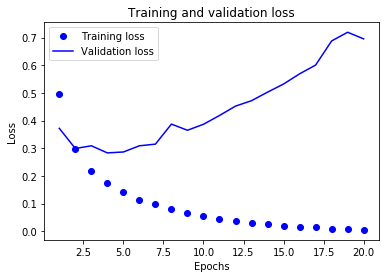

In [167]:
import matplotlib.pyplot as plt
%matplotlib inline

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


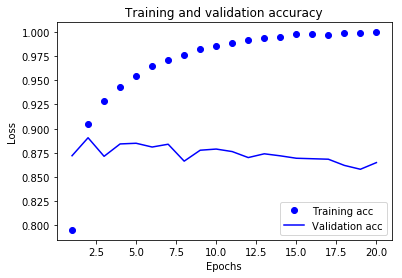

In [168]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


As you can see, the training loss decreases with every epoch, and the training accuracy increases with every epoch. That’s what you would expect when running gradient-descent optimization—the quantity you’re trying to minimize should be less with every iteration. But that isn’t the case for the validation loss and accuracy: they seem to peak at the fourth epoch. 



This is an example of what we warned against earlier: a model that performs better on the training data isn’t necessarily a model that will do better on data it has never seen before. In precise terms, what you’re seeing is overfitting: after the second epoch, you’re overoptimizing on the training data, and you end up learning representations that are specific to the training data and don’t generalize to data outside of the training set.

Let’s train a new network from scratch for four epochs`and then evaluate it on the test data.



In [169]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 7s 277us/step - loss: 0.4742 - acc: 0.8221
Epoch 2/4
25000/25000 [==============================] - 4s 166us/step - loss: 0.2634 - acc: 0.9102
Epoch 3/4
25000/25000 [==============================] - 4s 172us/step - loss: 0.1986 - acc: 0.9309
Epoch 4/4
25000/25000 [==============================] - 24s 974us/step


In [170]:
results

[0.32387810856819155, 0.87272]

### Using a trained network to generate predictions on new data

After having trained a network, you’ll want to use it in a practical setting. You can generate the likelihood of reviews being positive by using the ```predict``` method:

In [171]:
predict = model.predict(x_test)
predict

array([[0.135956  ],
       [0.9997054 ],
       [0.27625883],
       ...,
       [0.0751305 ],
       [0.04511876],
       [0.4906017 ]], dtype=float32)

In [173]:
def check(y_test, predict):

    for num,i in enumerate(predict[:15]):
        if (i>0.5 and y_test[num] == 1.0) or i<0.5 and y_test[num] == 0.0:
            print('Example # {0} is correct: {1}, {2}'.format(str(num), str(i), y_test[num]))
        else:
            print('Example # {0} is incorrect: {1}, {2}'.format(str(num), str(i), y_test[num]))

    return 'Finished 15 examples'

In [174]:
check(y_test, predict)

Example # 0 is correct: [0.135956], 0.0
Example # 1 is correct: [0.9997054], 1.0
Example # 2 is incorrect: [0.27625883], 1.0
Example # 3 is incorrect: [0.6446128], 0.0
Example # 4 is correct: [0.9230171], 1.0
Example # 5 is correct: [0.670831], 1.0
Example # 6 is correct: [0.99779356], 1.0
Example # 7 is correct: [0.00741729], 0.0
Example # 8 is incorrect: [0.9325054], 0.0
Example # 9 is correct: [0.9846294], 1.0
Example # 10 is correct: [0.8188883], 1.0
Example # 11 is correct: [0.00405905], 0.0
Example # 12 is correct: [0.00016613], 0.0
Example # 13 is correct: [0.0058833], 0.0
Example # 14 is correct: [0.9941754], 1.0


'Finished 15 examples'

As you can see, the network is confident for some samples (0.99 or more, or 0.01 or less) but less confident for others (0.6, 0.4).

### Home Tasks

The following experiments will help convince you that the architecture choices you’ve made are all fairly reasonable, although there’s still room for improvement:

* You used two hidden layers. Try using one or three hidden layers, and see how doing so affects validation and test accuracy.
* Try using layers with more hidden units or fewer hidden units: 32 units, 64 units, and so on.
* Try using the ```mse``` loss function instead of ```binary_crossentropy```.
* Try using the ```tanh``` activation (an activation that was popular in the early days of neural networks) instead of relu.

In [181]:
def model_experiment(hidden_units=[16,16], loss_f='binary_crossentropy', activation_l=['relu']*2, batch=512):
    model = models.Sequential()
    model.add(layers.Dense(hidden_units[0], activation=activation_l[0], input_shape=(10000,)))
    if len(hidden_units)>1:
        for unit,act in zip(hidden_units[1:], activation_l[1:]):
            model.add(layers.Dense(16, activation=act))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop',
                  loss=loss_f,
                  metrics=['accuracy'])

    model.fit(x_train, y_train, epochs=4, batch_size=batch)
    results = model.evaluate(x_test, y_test)
    
    return results

In [182]:
#three layers with 16 hidden units each
results = model_experiment(hidden_units = [16,16,16], activation_l=['relu']*3)

predict = model.predict(x_test)

#check(y_test, predict)
print(results)

[16, 16, 16]
Epoch 1/4
25000/25000 [==============================] - 13s 523us/step - loss: 0.4490 - acc: 0.8147
Epoch 2/4
25000/25000 [==============================] - 7s 290us/step - loss: 0.2506 - acc: 0.9096
Epoch 3/4
25000/25000 [==============================] - 6s 245us/step - loss: 0.1930 - acc: 0.9303
Epoch 4/4
25000/25000 [==============================] - 20s 819us/step
[0.3777674844837189, 0.85856]


In [183]:
#one layer with 16 hidden units 
results = model_experiment(hidden_units = [16])

predict = model.predict(x_test)

#check(y_test, predict)
print(results)

[16]
Epoch 1/4
25000/25000 [==============================] - 13s 502us/step - loss: 0.4334 - acc: 0.8289
Epoch 2/4
25000/25000 [==============================] - 6s 230us/step - loss: 0.2653 - acc: 0.9090
Epoch 3/4
25000/25000 [==============================] - 7s 273us/step - loss: 0.2096 - acc: 0.9285
Epoch 4/4
25000/25000 [==============================] - 13s 513us/step
[0.2840964234733582, 0.886]


In [184]:
#two layers with 16,32 hidden units 
results = model_experiment(hidden_units = [16,32])

predict = model.predict(x_test)

#check(y_test, predict)
print(results)

[16, 32]
Epoch 1/4
25000/25000 [==============================] - 10s 418us/step - loss: 0.4344 - acc: 0.8154
Epoch 2/4
25000/25000 [==============================] - 10s 412us/step - loss: 0.2485 - acc: 0.9106
Epoch 3/4
25000/25000 [==============================] - 7s 298us/step - loss: 0.1982 - acc: 0.9271
Epoch 4/4
25000/25000 [==============================] - 10s 406us/step
[0.29796602546215056, 0.88344]


In [185]:
## two layers with 512,128 hidden units 
results = model_experiment(hidden_units = [512,128])

predict = model.predict(x_test)

#check(y_test, predict)
print(results)

[512, 128]
Epoch 1/4
25000/25000 [==============================] - 29s 1ms/step - loss: 0.4490 - acc: 0.7913
Epoch 2/4
25000/25000 [==============================] - 22s 895us/step - loss: 0.2301 - acc: 0.9088
Epoch 3/4
25000/25000 [==============================] - 22s 894us/step - loss: 0.1631 - acc: 0.9359
Epoch 4/4
25000/25000 [==============================] - 20s 809us/step
[0.34389340611457825, 0.87848]


In [186]:
#two layers with 128,64 hidden units 
results = model_experiment(hidden_units = [128,64])

predict = model.predict(x_test)

#check(y_test, predict)
print(results)

[128, 64]
Epoch 1/4
25000/25000 [==============================] - 17s 689us/step - loss: 0.4378 - acc: 0.8056
Epoch 2/4
25000/25000 [==============================] - 13s 523us/step - loss: 0.2370 - acc: 0.9110
Epoch 3/4
25000/25000 [==============================] - 11s 438us/step - loss: 0.1875 - acc: 0.9284
Epoch 4/4
25000/25000 [==============================] - 16s 647us/step
[0.3895718560600281, 0.85956]


In [187]:
#default with mse loss
results = model_experiment(loss_f ='mse')

predict = model.predict(x_test)

#check(y_test, predict)
print(results)

[16, 16]
Epoch 1/4
25000/25000 [==============================] - 9s 377us/step - loss: 0.1445 - acc: 0.8165
Epoch 2/4
25000/25000 [==============================] - 8s 318us/step - loss: 0.0763 - acc: 0.9108
Epoch 3/4
25000/25000 [==============================] - 7s 265us/step - loss: 0.0577 - acc: 0.9326
Epoch 4/4
25000/25000 [==============================] - 8s 318us/step
[0.08649942491769791, 0.88192]


In [188]:
#tree layers [32,64,32] with mse loss and batch 1024
results = model_experiment(loss_f ='mse', hidden_units=[32,64,32,16,8], batch=1024)

predict = model.predict(x_test)

#check(y_test, predict)
print(results)

[32, 64, 32, 16, 8]
Epoch 1/4
25000/25000 [==============================] - 17s 695us/step - loss: 0.1657 - acc: 0.7645
Epoch 2/4
25000/25000 [==============================] - 6s 259us/step - loss: 0.0873 - acc: 0.8971
Epoch 3/4
25000/25000 [==============================] - 5s 207us/step - loss: 0.0691 - acc: 0.9167
Epoch 4/4
25000/25000 [==============================] - 24s 966us/step
[0.08489191980361939, 0.8868]


In [189]:
#two layers default with tanh
results = model_experiment(activation_l=['tanh']*2)

predict = model.predict(x_test)

#check(y_test, predict)
print(results)

[16, 16]
Epoch 1/4
25000/25000 [==============================] - 10s 411us/step - loss: 0.4288 - acc: 0.8279
Epoch 2/4
25000/25000 [==============================] - 15s 609us/step - loss: 0.2384 - acc: 0.9137
Epoch 3/4
25000/25000 [==============================] - 5s 215us/step - loss: 0.1796 - acc: 0.9335
Epoch 4/4
25000/25000 [==============================] - 13s 503us/step
[0.3201610572862625, 0.87864]


In [190]:
#two layers default with tanh + relu
results = model_experiment(activation_l=['tanh', 'relu'])

predict = model.predict(x_test)

#check(y_test, predict)
print(results)

[16, 16]
Epoch 1/4
25000/25000 [==============================] - 10s 406us/step - loss: 0.4711 - acc: 0.8171
Epoch 2/4
25000/25000 [==============================] - 7s 275us/step - loss: 0.2689 - acc: 0.9095
Epoch 3/4
25000/25000 [==============================] - 6s 244us/step - loss: 0.1974 - acc: 0.9303
Epoch 4/4
25000/25000 [==============================] - 8s 319us/step
[0.31699031797409055, 0.87148]


In [191]:
#three layers [32,16,32] with tanh + 2 relu, batch 32
results = model_experiment(activation_l=['tanh', *['relu']*2], hidden_units = [32,16,32], batch = 32)

predict = model.predict(x_test)

#check(y_test, predict)
print(results)

[32, 16, 32]
Epoch 1/4
25000/25000 [==============================] - 17s 679us/step - loss: 0.3142 - acc: 0.8669
Epoch 2/4
25000/25000 [==============================] - 12s 466us/step - loss: 0.2049 - acc: 0.9220
Epoch 3/4
25000/25000 [==============================] - 12s 464us/step - loss: 0.1677 - acc: 0.9365
Epoch 4/4
25000/25000 [==============================] - 7s 293us/step
[0.34078499784469607, 0.87196]


### !!Выводы

* **Количество слоев**: для данной задачи оптимальное количесво слоев - 1 или 2 (причем для 1 слоя результаты были лучше, чем для 2), при 3 accuracy начинает падать, что связано, скорее всего, с простотой задачи и не очень большим датасетом, для которого много слоев вызывает переобучение
* **Hidden Units**: увеличение юнитов при дефолтном количестве слоев дает небольшое улучшение (для HU=\[16,32\]), но в пределах разумного. К тому же, судя по всему, результаты лучше, если выставлять HU по возрастанию (или как минимум не по убыванию)
* **MSE**: уменьшеие loss при замене Crossentropy на MSE связано по больше части с тем, как эти метрики считаются, поэтому сравнить их будет сложно. При этом accuracy при MSE стала немного выше (на ~0.01%). Это может быть случайно, так как использование MSE для классификации немного бессмысленно, ибо эта метрика смотрит с точки зрения разницы между реальным и предсказанным, и в случае, например, y_actual = 1 и y_predicted = 0,502, значение MSE будет высоким, тогда как метрики классификации засчитают это как правильный ответ
* **Tanh**: использование только `tanh`, как и использование `tanh` в сочетании с `relu`, привело к незначительному ухудшению показателей, скорее всего потому, что эти функции хоть и похожи, но `relu` все же более новая и, возможно, точная

### Wrapping Up

* You usually need to do quite a bit of preprocessing on your raw data in order to be able to feed it—as tensors—into a neural network. Sequences of words can be encoded as binary vectors, but there are other encoding options, too.

* Stacks of ```Dense``` layers with ```relu``` activations can solve a wide range of problems (including sentiment classification), and you’ll likely use them frequently.


* In a binary classification problem (two output classes), your network should end with a ```Dense``` layer with one unit and a ```sigmoid``` activation: the output of your network should be a scalar between 0 and 1, encoding a probability.

* With such a scalar sigmoid output on a binary classification problem, the loss function you should use is ```binary_crossentropy```.


* The ```rmsprop``` optimizer is generally a good enough choice, whatever your problem. That’s one less thing for you to worry about.


* As they get better on their training data, neural networks eventually start overfitting and end up obtaining increasingly worse results on data they’ve never seen before. Be sure to always monitor performance on data that is outside of the training set.


## Classifying newswires: a multiclass classification example

What happens when you have more than two classes?

Now, we’ll build a network to classify *Reuters newswires* into 46 mutually exclusive topics. Because you have many classes, this problem is an instance of **multiclass classification**; and because each data point should be classified into only one category, the problem is more specifically an instance of **single-label, multiclass classification**. If each data point could belong to multiple categories (in this case, topics), you’d be facing a **multilabel**, **multiclass classification** problem.

### The Reuters dataset

You’ll work with the Reuters dataset, a set of short newswires and their topics, published by Reuters in 1986. It’s a simple, widely used toy dataset for text classification. There are 46 different topics; some topics are more represented than others, but each topic has at least 10 examples in the training set.

Like IMDB and MNIST, the Reuters dataset comes packaged as part of Keras. Let’s take a look.



In [235]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

As with the IMDB dataset, the argument num_words=10000 restricts the data to the 10,000 most frequently occurring words found in the data.

You have 8,982 training examples and 2,246 test examples:

In [236]:
print("Training examples: {}".format(len(train_data)))
print("Test examples: {}".format(len(test_data)))

Training examples: 8982
Test examples: 2246


As with the IMDB reviews, each example is a list of integers (word indices):

In [237]:
print(train_data[10])

[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]


Here’s how you can decode it back to words, in case you’re curious.

In [238]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
    train_data[0]])
decoded_newswire


'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

The label associated with an example is an integer between 0 and 45—a topic index:

In [239]:
train_labels[10]

3

### Preparing the data

You can vectorize the data with the exact same code as in the previous example.

In [240]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


To vectorize the labels, there are two possibilities: you can cast the label list as an integer tensor, or you can use one-hot encoding. One-hot encoding is a widely used format for categorical data, also called **categorical encoding**.

In our case, one-hot encoding of the labels consists of embedding each label as an all-zero vector with a 1 in the place of the label index. Here’s an example:

In [241]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)


Note that there is a built-in way to do this in Keras, which you’ve already seen in action in the MNIST example:

In [242]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

### Building your network

This topic-classification problem looks similar to the previous movie-review classification problem: in both cases, you’re trying to classify short snippets of text. But there is a new constraint here: the number of output classes has gone from 2 to 46. The dimensionality of the output space is much larger.



In a stack of ```Dense``` layers like that you’ve been using, each layer can only access information present in the output of the previous layer. If one layer drops some information relevant to the classification problem, this information can never be recovered by later layers: each layer can potentially become an information bottleneck. In the previous example, you used 16-dimensional intermediate layers, but a 16-dimensional space may be too limited to learn to separate 46 different classes: such small layers may act as information bottlenecks, permanently dropping relevant information.

For this reason you’ll use larger layers. Let’s go with 64 units.

In [243]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

There are two other things you should note about this architecture:

* You end the network with a ```Dense``` layer of size 46. This means for each input sample, the network will output a 46-dimensional vector. Each entry in this vector (each dimension) will encode a different output class.
* The last layer uses a ```softmax``` activation. You saw this pattern in the MNIST example. It means the network will output a **probability distribution** over the 46 different output classes—for every input sample, the network will produce a 46-dimensional output vector, where ```output[i]``` is the probability that the sample belongs to class ```i```. The 46 scores will sum to 1.

The best loss function to use in this case is ```categorical_crossentropy```. It measures the distance between two probability distributions: here, between the probability distribution output by the network and the true distribution of the labels. By minimizing the distance between these two distributions, you train the network to output something as close as possible to the true labels.



In [244]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Validating your approach

Let’s set apart 1,000 samples in the training data to use as a validation set.



In [245]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

Now, let’s train the network for 20 epochs.



In [246]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val)
                   )

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 5s 672us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7208 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 2s 252us/step - loss: 1.4451 - acc: 0.6878 - val_loss: 1.3457 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 2s 237us/step - loss: 1.0951 - acc: 0.7657 - val_loss: 1.1714 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 2s 248us/step - loss: 0.8695 - acc: 0.8160 - val_loss: 1.0776 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 2s 298us/step - loss: 0.7032 - acc: 0.8475 - val_loss: 0.9848 - val_acc: 0.7830
Epoch 6/20
7982/7982 [==============================] - 2s 273us/step - loss: 0.5663 - acc: 0.8797 - val_loss: 0.9410 - val_acc: 0.8030
Epoch 7/20
7982/7982 [==============================] - 2s 234us/step - loss: 0.4578 - acc: 0.9050 - val_loss: 0.9081 - val_acc: 0.8010


And finally, let’s display its loss and accuracy curves.

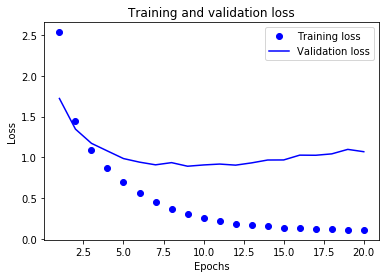

In [247]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

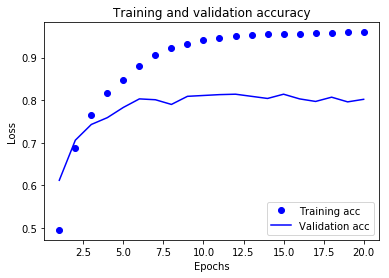

In [248]:
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


When network begins overfit?

Let’s train a new network from scratch for nine epochs and then evaluate it on the test set.

In [249]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)
results

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 5s 661us/step - loss: 2.5395 - acc: 0.5229 - val_loss: 1.6734 - val_acc: 0.6530
Epoch 2/9
7982/7982 [==============================] - 2s 256us/step - loss: 1.3708 - acc: 0.7122 - val_loss: 1.2747 - val_acc: 0.7220
Epoch 3/9
7982/7982 [==============================] - 2s 269us/step - loss: 1.0133 - acc: 0.7790 - val_loss: 1.1334 - val_acc: 0.7520
Epoch 4/9
7982/7982 [==============================] - 2s 250us/step - loss: 0.7981 - acc: 0.8250 - val_loss: 1.0543 - val_acc: 0.7590
Epoch 5/9
7982/7982 [==============================] - 2s 268us/step - loss: 0.6395 - acc: 0.8627 - val_loss: 0.9760 - val_acc: 0.7930
Epoch 6/9
7982/7982 [==============================] - 2s 240us/step - loss: 0.5118 - acc: 0.8923 - val_loss: 0.9091 - val_acc: 0.8150
Epoch 7/9
7982/7982 [==============================] - 2s 265us/step - loss: 0.4118 - acc: 0.9139 - val_loss: 0.8926 - val_acc: 0.8200
Epoch 8

[1.0261685788790669, 0.7751558326443496]

This approach reaches an accuracy of ~78%. With a balanced binary classification problem, the accuracy reached by a purely random classifier would be 50%. But in this case it’s closer to 19%, so the results seem pretty good.

### Generating predictions on new data

You can verify that the ```predict``` method of the model instance returns a probability distribution over all 46 topics. Let’s generate topic predictions for all of the test data.

In [250]:
# Generating predictions for new data
predictions = model.predict(x_test)

Each entry in predictions is a vector of length 46 and coefficients in this vector sum to 1:

In [251]:
print('Shape: {}'.format(predictions[0].shape))
print('Sum: {:.4f}'.format(np.sum(predictions[0])))

Shape: (46,)
Sum: 1.0000


The largest entry is the predicted class—the class with the highest probability:

In [252]:
np.argmax(predictions[0])

3

### A different way to handle the labels and the loss

We mentioned earlier that another way to encode the labels would be to cast them as an integer tensor, like this:

In [253]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

The only thing this approach would change is the choice of the loss function. The loss function ```categorical_crossentropy```, expects the labels to follow a categorical encoding. With integer labels, you should use ```sparse_categorical_crossentropy```:


In [254]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

This new loss function is still mathematically the same as ```categorical_crossentropy```; it just has a different interface.


### The importance of having sufficiently large intermediate layers

We mentioned earlier that because the final outputs are 46-dimensional, you should avoid intermediate layers with many fewer than 46 hidden units. Now let’s see what happens when you introduce an information bottleneck by having intermediate layers that are significantly less than 46-dimensional: for example, 4-dimensional.

In [255]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 6s 693us/step - loss: 3.1699 - acc: 0.2424 - val_loss: 2.6158 - val_acc: 0.2720
Epoch 2/20
7982/7982 [==============================] - 3s 393us/step - loss: 2.0610 - acc: 0.5443 - val_loss: 1.7015 - val_acc: 0.5850
Epoch 3/20
7982/7982 [==============================] - 3s 374us/step - loss: 1.5012 - acc: 0.6230 - val_loss: 1.5110 - val_acc: 0.6410
Epoch 4/20
7982/7982 [==============================] - 3s 380us/step - loss: 1.2892 - acc: 0.6903 - val_loss: 1.4221 - val_acc: 0.6720
Epoch 5/20
7982/7982 [==============================] - 3s 372us/step - loss: 1.1460 - acc: 0.7157 - val_loss: 1.3649 - val_acc: 0.6810
Epoch 6/20
7982/7982 [==============================] - 3s 352us/step - loss: 1.0407 - acc: 0.7309 - val_loss: 1.3428 - val_acc: 0.6980
Epoch 7/20
7982/7982 [==============================] - 3s 361us/step - loss: 0.9598 - acc: 0.7419 - val_loss: 1.3417 - val_acc: 0.7000


In [256]:
results = model.evaluate(x_test, one_hot_test_labels)
results

2246/2246 [==============================] - 1s 259us/step


[1.9637535590734847, 0.6901157613535174]

The network now peaks at ~69% validation accuracy, an 8% absolute drop. This drop is mostly due to the fact that you’re trying to compress a lot of information (enough information to recover the separation hyperplanes of 46 classes) into an intermediate space that is too low-dimensional. The network is able to cram most of the necessary information into these eight-dimensional representations, but not all of it.



### Further experiments (Hometask)

* Try using larger or smaller layers: 32 units, 128 units, and so on.
* You used two hidden layers. Now try using a single hidden layer, or three hidden layers.

In [257]:
def model_multiclass(hidden_units=[64,64]):
    model = models.Sequential()
    model.add(layers.Dense(hidden_units[0], activation='relu', input_shape=(10000,)))
    if len(hidden_units)>1:
        for unit in hidden_units[1:]:
            model.add(layers.Dense(unit, activation='relu'))
    model.add(layers.Dense(46, activation='softmax'))

    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    model.fit(partial_x_train,
              partial_y_train,
              epochs=20,
              batch_size=128,
              validation_data=(x_val, y_val))
    results = model.evaluate(x_test, one_hot_test_labels)

    return results

In [258]:
#two HU [128,64]

model_multiclass([128,64])

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 7s 842us/step - loss: 1.6587 - acc: 0.6472 - val_loss: 1.1530 - val_acc: 0.7470
Epoch 2/20
7982/7982 [==============================] - 4s 489us/step - loss: 0.7945 - acc: 0.8338 - val_loss: 1.0054 - val_acc: 0.7780
Epoch 3/20
7982/7982 [==============================] - 4s 494us/step - loss: 0.4820 - acc: 0.8999 - val_loss: 0.8508 - val_acc: 0.8210
Epoch 4/20
7982/7982 [==============================] - 4s 494us/step - loss: 0.3213 - acc: 0.9291 - val_loss: 0.8649 - val_acc: 0.8300
Epoch 5/20
7982/7982 [==============================] - 4s 497us/step - loss: 0.2395 - acc: 0.9424 - val_loss: 0.9465 - val_acc: 0.8120
Epoch 6/20
7982/7982 [==============================] - 4s 497us/step - loss: 0.2021 - acc: 0.9505 - val_loss: 0.9497 - val_acc: 0.8170
Epoch 7/20
7982/7982 [==============================] - 4s 530us/step - loss: 0.1749 - acc: 0.9516 - val_loss: 1.0073 - val_acc: 0.8040


[1.5460947742445175, 0.7724844167408726]

In [259]:
#four HU [64,128,512,128]

model_multiclass([64,128,512,128])

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 7s 885us/step - loss: 1.7006 - acc: 0.6007 - val_loss: 1.2705 - val_acc: 0.7120
Epoch 2/20
7982/7982 [==============================] - 3s 438us/step - loss: 0.9665 - acc: 0.7684 - val_loss: 1.0685 - val_acc: 0.7620
Epoch 3/20
7982/7982 [==============================] - 3s 434us/step - loss: 0.6448 - acc: 0.8480 - val_loss: 1.0193 - val_acc: 0.7820
Epoch 4/20
7982/7982 [==============================] - 4s 447us/step - loss: 0.4509 - acc: 0.8929 - val_loss: 1.1055 - val_acc: 0.7830
Epoch 5/20
7982/7982 [==============================] - 4s 442us/step - loss: 0.3190 - acc: 0.9208 - val_loss: 1.1357 - val_acc: 0.7830
Epoch 6/20
7982/7982 [==============================] - 3s 437us/step - loss: 0.2524 - acc: 0.9349 - val_loss: 1.2521 - val_acc: 0.7950
Epoch 7/20
7982/7982 [==============================] - 4s 453us/step - loss: 0.1906 - acc: 0.9494 - val_loss: 1.3933 - val_acc: 0.7620


[2.104450701393406, 0.7720391808188821]

In [260]:
#one HU [512]

model_multiclass([512])

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 14s 2ms/step - loss: 1.2913 - acc: 0.7245 - val_loss: 0.8785 - val_acc: 0.8200
Epoch 2/20
7982/7982 [==============================] - 11s 1ms/step - loss: 0.4895 - acc: 0.8969 - val_loss: 0.7879 - val_acc: 0.8490
Epoch 3/20
7982/7982 [==============================] - 11s 1ms/step - loss: 0.2828 - acc: 0.9374 - val_loss: 0.8143 - val_acc: 0.8300
Epoch 4/20
7982/7982 [==============================] - 11s 1ms/step - loss: 0.2132 - acc: 0.9485 - val_loss: 0.8724 - val_acc: 0.8200
Epoch 5/20
7982/7982 [==============================] - 11s 1ms/step - loss: 0.1845 - acc: 0.9515 - val_loss: 0.9099 - val_acc: 0.8210
Epoch 6/20
7982/7982 [==============================] - 12s 1ms/step - loss: 0.1600 - acc: 0.9538 - val_loss: 1.0068 - val_acc: 0.8050
Epoch 7/20
7982/7982 [==============================] - 11s 1ms/step - loss: 0.1492 - acc: 0.9538 - val_loss: 1.0161 - val_acc: 0.8050
Epoch 8

[1.8544648693590853, 0.7831700801955518]

In [261]:
#one HU [64]

model_multiclass([64])

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 6s 694us/step - loss: 1.7904 - acc: 0.6391 - val_loss: 1.2056 - val_acc: 0.7340
Epoch 2/20
7982/7982 [==============================] - 3s 337us/step - loss: 0.9296 - acc: 0.8028 - val_loss: 0.9671 - val_acc: 0.8060
Epoch 3/20
7982/7982 [==============================] - 3s 334us/step - loss: 0.6347 - acc: 0.8673 - val_loss: 0.8626 - val_acc: 0.8150
Epoch 4/20
7982/7982 [==============================] - 3s 342us/step - loss: 0.4535 - acc: 0.9060 - val_loss: 0.8284 - val_acc: 0.8230
Epoch 5/20
7982/7982 [==============================] - 3s 337us/step - loss: 0.3358 - acc: 0.9282 - val_loss: 0.8204 - val_acc: 0.8220
Epoch 6/20
7982/7982 [==============================] - 3s 342us/step - loss: 0.2629 - acc: 0.9416 - val_loss: 0.8310 - val_acc: 0.8180
Epoch 7/20
7982/7982 [==============================] - 3s 353us/step - loss: 0.2155 - acc: 0.9484 - val_loss: 0.8350 - val_acc: 0.8220


[1.3856020014092845, 0.7831700801955518]

In [262]:
#two HU [512, 1024]

model_multiclass([512,1024])

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 16s 2ms/step - loss: 1.3820 - acc: 0.6785 - val_loss: 0.9537 - val_acc: 0.7930
Epoch 2/20
7982/7982 [==============================] - 12s 2ms/step - loss: 0.5712 - acc: 0.8728 - val_loss: 0.8621 - val_acc: 0.8180
Epoch 3/20
7982/7982 [==============================] - 12s 2ms/step - loss: 0.2920 - acc: 0.9346 - val_loss: 0.9785 - val_acc: 0.8150
Epoch 4/20
7982/7982 [==============================] - 12s 2ms/step - loss: 0.2018 - acc: 0.9485 - val_loss: 1.0514 - val_acc: 0.8010
Epoch 5/20
7982/7982 [==============================] - 12s 2ms/step - loss: 0.1629 - acc: 0.9520 - val_loss: 1.1523 - val_acc: 0.7860
Epoch 6/20
7982/7982 [==============================] - 12s 2ms/step - loss: 0.1402 - acc: 0.9525 - val_loss: 1.2648 - val_acc: 0.7830
Epoch 7/20
7982/7982 [==============================] - 13s 2ms/step - loss: 0.1205 - acc: 0.9544 - val_loss: 1.2047 - val_acc: 0.8110
Epoch 8

[2.166380277193771, 0.7827248442204849]

### !Выводы

* Лучше всего результаты при небольшом количестве слоев (1-2) и HU >=64. Это связано с тем, что задача относительно несложная и датасет небольшой, поэтому не нуждается в большом количестве слоев. При этом, количество HU лучше держать ближе непосредственно к количеству инпутов, но не меньше, так как это позволяет наиболее оптимально их представлять. HU >64 по результатам вышли очень близко, но все же немного хуже, чем 64 

### Wrapping up

* If you’re trying to classify data points among N classes, your network should end with a ```Dense``` layer of size N.


* In a single-label, multiclass classification problem, your network should end with a ```softmax``` activation so that it will output a probability distribution over the N output classes.


* Categorical crossentropy is almost always the loss function you should use for such problems. It minimizes the distance between the probability distributions output by the network and the true distribution of the targets.


* There are two ways to handle labels in multiclass classification:
     * Encoding the labels via categorical encoding (also known as one-hot encoding) and using ```categorical_crossentropy``` as a loss function
     
     * Encoding the labels as integers and using the ```sparse_categorical_crossentropy``` loss function


* If you need to classify data into a large number of categories, you should avoid creating information bottlenecks in your network due to intermediate layers that are too small.

## Predicting house prices: a regression example

The two previous examples were considered classification problems, where the goal was to predict a single discrete label of an input data point. Another common type of machine-learning problem is regression, which consists of predicting a continuous value instead of a discrete label: for instance, predicting the temperature tomorrow, given meteorological data; or predicting the time that a software project will take to complete, given its specifications.



### The Boston Housing Price dataset


You’ll attempt to predict the median price of homes in a given Boston suburb in the mid-1970s, given data points about the suburb at the time, such as the crime rate, the local property tax rate, and so on. The dataset you’ll use has an interesting difference from the two previous examples. It has relatively few data points: only 506, split between 404 training samples and 102 test samples. And each feature in the input data (for example, the crime rate) has a different scale. For instance, some values are proportions, which take values between 0 and 1; others take values between 1 and 12, others between 0 and 100, and so on.



In [224]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57344/57026 [==============================] - 0s 3us/step


Let’s look at the data:

In [225]:
print('Shape of train data: {}'.format(train_data.shape))
print('Shape of test data: {}'.format(test_data.shape))

Shape of train data: (404, 13)
Shape of test data: (102, 13)


The targets are the median values of owner-occupied homes, in thousands of dollars:



In [226]:
train_targets[:10]

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4])

The prices are typically between \$10,000 and \$50,000. If that sounds cheap, remember that this was the mid-1970s, and these prices aren’t adjusted for inflation.

###  Preparing the data

It would be problematic to feed into a neural network values that all take wildly different ranges. The network might be able to automatically adapt to such heterogeneous data, but it would definitely make learning more difficult. A widespread best practice to deal with such data is to do feature-wise normalization: for each feature in the input data (a column in the input data matrix), you subtract the mean of the feature and divide by the standard deviation, so that the feature is centered around 0 and has a unit standard deviation. This is easily done in Numpy.



In [227]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

Note that the quantities used for normalizing the test data are computed using the training data. You should never use in your workflow any quantity computed on the test data, even for something as simple as data normalization.



### Building your network

Because so few samples are available, you’ll use a very small network with two hidden layers, each with 64 units. In general, the less training data you have, the worse overfitting will be, and using a small network is one way to mitigate overfitting.

In [228]:
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model


The network ends with a single unit and no activation (it will be a linear layer). This is a typical setup for scalar regression (a regression where you’re trying to predict a single continuous value). Applying an activation function would constrain the range the output can take; for instance, if you applied a ```sigmoid``` activation function to the last layer, the network could only learn to predict values between 0 and 1. Here, because the last layer is purely linear, the network is free to learn to predict values in any range.



Note that you compile the network with the ```mse``` loss function—**mean squared error**, the square of the difference between the predictions and the targets. This is a widely used loss function for regression problems.

You’re also monitoring a new metric during training: **mean absolute error (MAE)**. It’s the absolute value of the difference between the predictions and the targets. For instance, an MAE of 0.5 on this problem would mean your predictions are off by \$500 on average.



### Validating your approach using K-fold validation

To evaluate your network while you keep adjusting its parameters (such as the number of epochs used for training), you could split the data into a training set and a validation set, as you did in the previous examples. But because you have so few data points, the validation set would end up being very small (for instance, about 100 examples). As a consequence, the validation scores might change a lot depending on which data points you chose to use for validation and which you chose for training: the validation scores might have a high variance with regard to the validation split. This would prevent you from reliably evaluating your model.



The best practice in such situations is to use **K-fold cross-validation**. It consists of splitting the available data into **K** partitions (typically K = 4 or 5), instantiating K identical models, and training each one on K – 1 partitions while evaluating on the remaining partition. The validation score for the model used is then the average of the K validation scores obtained. In terms of code, this is straightforward.

![](https://dpzbhybb2pdcj.cloudfront.net/chollet/Figures/03fig11_alt.jpg)

In [229]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)


processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


Running this with num_epochs = 100 yields the following results:



In [230]:
print(all_scores)
print(np.mean(all_scores))

[2.0839114802898746, 2.183241334291968, 3.032786860324369, 2.338509645202372]
2.409612330027146


The different runs do indeed show rather different validation scores, from 2.08 to 2.96. The average (3.0) is a much more reliable metric than any single score—that’s the entire point of K-fold cross-validation. In this case, you’re off by \$3,000 on average, which is significant considering that the prices range from \$10,000 to \$50,000.



Let’s try training the network a bit longer: 500 epochs. To keep a record of how well the model does at each epoch, you’ll modify the training loop to save the per-epoch validation score log.

In [231]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)
    

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


You can then compute the average of the per-epoch MAE scores for all folds.



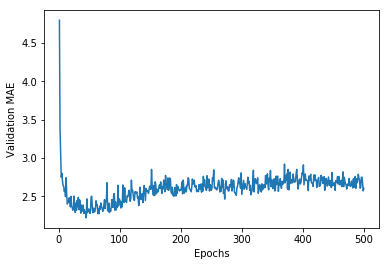

In [232]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

It may be a little difficult to see the plot, due to scaling issues and relatively high variance. 

Let’s do the following:

Omit the first 10 data points, which are on a different scale than the rest of the curve.
Replace each point with an exponential moving average of the previous points, to obtain a smooth curve.

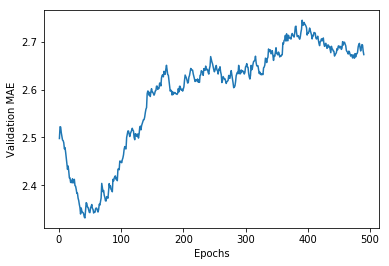

In [233]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

According to this plot, validation MAE stops improving significantly after 80 epochs. Past that point, you start overfitting.



Once you’re finished tuning other parameters of the model (in addition to the number of epochs, you could also adjust the size of the hidden layers), you can train a final production model on all of the training data, with the best parameters, and then look at its performance on the test data.



In [234]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)


102/102 [==============================] - 1s 10ms/step


Here’s the final result:

In [263]:
test_mae_score

2.678104092093075

You’re still off by about \$2,550.



### Wrapping up

* Regression is done using different loss functions than what we used for classification. Mean squared error (MSE) is a loss function commonly used for regression.


* Similarly, evaluation metrics to be used for regression differ from those used for classification; naturally, the concept of accuracy doesn’t apply for regression. A common regression metric is mean absolute error (MAE).


* When features in the input data have values in different ranges, each feature should be scaled independently as a preprocessing step.


* When there is little data available, using K-fold validation is a great way to reliably evaluate a model.


* When little training data is available, it’s preferable to use a small network with few hidden layers (typically only one or two), in order to avoid severe overfitting.